In [1]:
import osmnx as ox
import momepy
import geopandas as gpd
import shapely
from shapely.geometry import LineString
import os

/home/virgilxw/miniconda3/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
# Set the local coordinate reference system to EPSG 3414 (which is the projected CRS used in Singapore)
local_crs = 3414

# Define the place of interest as a string variable
place = "Singapore"

# Define the latitude and longitude coordinates of the center point of the study area as a tuple
latlng = (1.29, 103.85)

# Define the distance in meters from the center point that the study area will cover
dist = 30000

# Read in the study area polygon shapefile, which is in the local CRS, and convert it to EPSG 4326 (WGS 84) for compatibility with other data sources
study_area = gpd.read_file("./source/Singapore_studyArea.shp").to_crs(epsg=4326)

# Calculate the union of all study area polygons to create a single polygon that covers the entire study area
study_area_polygon = study_area.geometry.unary_union


In [3]:
# Use the study area polygon to extract water geometries (i.e. bodies of water) from OpenStreetMap data using the `geometries_from_polygon` function from the `osmnx` library
# `tags` parameter specifies which OSM tags to include in the extraction (in this case, only include natural=water tags)
water = ox.geometries.geometries_from_polygon(study_area_polygon, tags={"natural": "water"})

# Preview the first few rows of the resulting GeoDataFrame
water.head()


created_by  \
element_type osmid                 
way          20250182        NaN   
             20423973        NaN   
             20498763        NaN   
             22721003        NaN   
             22733434        NaN   

                                                                geometry  \
element_type osmid                                                         
way          20250182  POLYGON ((103.92047 1.34528, 103.92139 1.34554...   
             20423973  POLYGON ((103.67731 1.42621, 103.67675 1.42505...   
             20498763  POLYGON ((103.72775 1.31232, 103.72732 1.31062...   
             22721003  POLYGON ((103.76496 1.38275, 103.76513 1.38275...   
             22733434  POLYGON ((103.75442 1.35741, 103.75414 1.35715...   

                                     name leisure access barrier artist_name  \
element_type osmid                                                             
way          20250182     Bedok Reservoir     NaN    NaN     NaN         NaN   
             20423973  Sarimbun Reservoir     NaN    NaN     NaN         NaN   
             20498763       Sungei Jurong     NaN    NaN     NaN         NaN   
             22721003       Pang Sua Pond     NaN    NaN     NaN         NaN   
             22733434       Little Guilin     NaN    NaN     NaN         NaN   

                      artwork_type description image  ... dock  ref basin  \
element_type osmid                                    ...                   
way          20250182          NaN         NaN   NaN  ...  NaN  NaN   NaN   
             20423973          NaN         NaN   NaN  ...  NaN  NaN   NaN   
             20498763          NaN         NaN   NaN  ...  NaN  NaN   NaN   
             22721003          NaN         NaN   NaN  ...  NaN  NaN   NaN   
             22733434          NaN         NaN   NaN  ...  NaN  NaN   NaN   

                      floor level:ref width ways name:de name:ja name:th  
element_type osmid                                                        
way          20250182   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             20423973   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             20498763   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             22721003   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             22733434   NaN       NaN   NaN  NaN     NaN     NaN     NaN  

[5 rows x 75 columns]

In [4]:
# Overlay the `water` GeoDataFrame on top of the `study_area` polygon using the 'difference' method to remove the water geometries from the study area polygon
study_area = study_area.overlay(water, how='difference')

<Axes: >

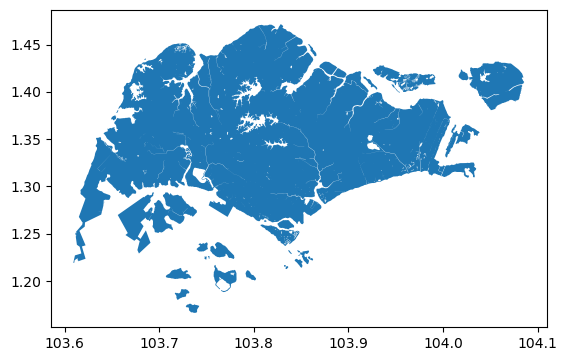

In [5]:
# Create a plot of the `study_area` polygon using the `plot()` method
study_area.plot()

In [6]:
# Use the study area polygon to extract building geometries from OpenStreetMap data using the `geometries_from_polygon` function from the `osmnx` library
# `tags` parameter specifies which OSM tags to include in the extraction (in this case, only include building tags)
buildings = ox.geometries.geometries_from_polygon(study_area_polygon, tags={'building':True})

# Preview the first few rows of the resulting GeoDataFrame
buildings.head()

amenity                   geometry addr:street  \
element_type osmid                                                      
node         518475196     NaN  POINT (103.81225 1.30876)         NaN   
             965698989     NaN  POINT (103.82913 1.29577)         NaN   
             965700669     NaN  POINT (103.82906 1.29618)         NaN   
             965700671     NaN  POINT (103.82825 1.29639)         NaN   
             965700673     NaN  POINT (103.83048 1.29633)         NaN   

                       entrance alt_name bench  bin  bus highway location  \
element_type osmid                                                          
node         518475196      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965698989      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700669      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700671      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700673      NaN      NaN   NaN  NaN  NaN     NaN      NaN   

                        ... cooling:method ways building:1992-2017  \
element_type osmid      ...                                          
node         518475196  ...            NaN  NaN                NaN   
             965698989  ...            NaN  NaN                NaN   
             965700669  ...            NaN  NaN                NaN   
             965700671  ...            NaN  NaN                NaN   
             965700673  ...            NaN  NaN                NaN   

                       name:1992-2017 name:vi garden:type  \
element_type osmid                                          
node         518475196            NaN     NaN         NaN   
             965698989            NaN     NaN         NaN   
             965700669            NaN     NaN         NaN   
             965700671            NaN     NaN         NaN   
             965700673            NaN     NaN         NaN   

                       parking:condition:both parking:lane:both end_date  \
element_type osmid                                                         
node         518475196                    NaN               NaN      NaN   
             965698989                    NaN               NaN      NaN   
             965700669                    NaN               NaN      NaN   
             965700671                    NaN               NaN      NaN   
             965700673                    NaN               NaN      NaN   

                       roof:level  
element_type osmid                 
node         518475196        NaN  
             965698989        NaN  
             965700669        NaN  
             965700671        NaN  
             965700673        NaN  

[5 rows x 422 columns]

In [7]:
# Select only building geometries that are valid polygons (i.e. exclude other geometry types like Points and MultiPolygons) and convert the GeoDataFrame to the local coordinate reference system
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)
buildings = buildings[["geometry"]].to_crs(local_crs)

# Print the count of each geometry type to check that only Polygon geometries remain
print(buildings.geom_type.value_counts())

Polygon    112718
dtype: int64


In [8]:
# Merge adjacent or overlapping building polygons using the `unary_union()` method
merged = buildings.geometry.unary_union

# Convert the merged geometry back to a GeoDataFrame with a single polygon
merged_buildings_gdf = gpd.GeoDataFrame(geometry=[merged])

# Explode the GeoDataFrame to convert the single polygon back into multiple separate polygons
buildings = merged_buildings_gdf.explode()

# Select only building geometries that are valid polygons (i.e. exclude other geometry types like Points and MultiPolygons)
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)


/tmp/ipykernel_9251/1234733396.py:6: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  buildings = merged_buildings_gdf.explode()


In [9]:
# Add a new column to the GeoDataFrame called "uID" containing a range of values from 0 to the length of the GeoDataFrame (minus 1)
buildings["uID"] = range(len(buildings))

In [10]:
# Print out the count of each type of geometry in the GeoDataFrame
print(buildings.geom_type.value_counts())

# Display the first few rows of the GeoDataFrame
buildings.head()

Polygon    76533
dtype: int64


,geometry,uID
0,"POLYGON ((4098.105 23706.883, 4109.145 23706.8...",0
1,"POLYGON ((4169.087 23688.953, 4169.269 23731.3...",1
2,"POLYGON ((4129.786 23795.994, 4196.953 23795.9...",2
3,"POLYGON ((3940.171 23898.114, 3939.741 23952.6...",3
4,"POLYGON ((3908.968 23952.996, 3934.866 23953.1...",4


In [35]:
osm_graph= ox.graph.graph_from_polygon(study_area_polygon, network_type='drive')
osm_graph = ox.projection.project_graph(osm_graph, to_crs=local_crs)
streets = ox.graph_to_gdfs(
    osm_graph,
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True
)

streets.head()

osmid  \
u          v          key                                                      
25451915   25451918   0    [166741187, 649636776, 649636777, 717446235, 2...   
25451918   242636478  0                                             22617511   
           1143899970 0                                            166741192   
242636478  4656921454 0                      [37584993, 37584994, 655660141]   
1143899970 1782376557 0                                            200159288   

                           oneway      lanes  ref                    name  \
u          v          key                                                   
25451915   25451918   0      True     [3, 4]  ECP      East Coast Parkway   
25451918   242636478  0      True          1  NaN                     NaN   
           1143899970 0      True          3  ECP      East Coast Parkway   
242636478  4656921454 0      True  [3, 2, 4]  NaN  Tanah Merah Coast Road   
1143899970 1782376557 0      True          3  ECP      East Coast Parkway   

                                 highway maxspeed reversed   length bridge  \
u          v          key                                                    
25451915   25451918   0         motorway       90    False  963.113    yes   
25451918   242636478  0    motorway_link       50    False  278.409    NaN   
           1143899970 0         motorway       90    False  670.252    NaN   
242636478  4656921454 0          primary       60    False  301.106    yes   
1143899970 1782376557 0         motorway       90    False  314.233    NaN   

                                                                    geometry  \
u          v          key                                                      
25451915   25451918   0    LINESTRING (44186.853 35217.240, 44144.233 351...   
25451918   242636478  0    LINESTRING (43649.291 34422.228, 43648.779 344...   
           1143899970 0    LINESTRING (43649.291 34422.228, 43492.918 342...   
242636478  4656921454 0    LINESTRING (43724.424 34208.291, 43746.393 342...   
1143899970 1782376557 0    LINESTRING (43269.766 33872.637, 43113.671 336...   

                          access tunnel junction width  
u          v          key                               
25451915   25451918   0      NaN    NaN      NaN   NaN  
25451918   242636478  0      NaN    NaN      NaN   NaN  
           1143899970 0      NaN    NaN      NaN   NaN  
242636478  4656921454 0      yes    NaN      NaN   NaN  
1143899970 1782376557 0      NaN    NaN      NaN   NaN

In [36]:
# create a new column in the streets GeoDataFrame called 'motorway' that is 1 if the 'highway' column contains 'motorway', 'trunk', 'motorway_link' or 'trunk_link' and 0 otherwise
def is_motorway(highway):
    if isinstance(highway, list):
        return 1 if any(x in ['motorway', 'trunk', 'motorway_link', 'trunk_link'] for x in highway) else 0
    else:
        return 1 if highway in ['motorway', 'trunk', 'motorway_link', 'trunk_link'] else 0
streets["is_motorway"] = streets["highway"].apply(is_motorway)

def is_primary(highway):
    if isinstance(highway, list):
        return 1 if any(x in ['primary', 'primary_link'] for x in highway) else 0
    else:
        return 1 if highway in ['primary', 'primary_link'] else 0
    
def is_link(highway):
    if isinstance(highway, list):
        return 1 if any(x in ['motorway_link', 'trunk_link', "primary_link", "secondary_link", "tertiary_link"] for x in highway) else 0
    else:
        return 1 if highway in ['motorway_link', 'trunk_link', "primary_link", "secondary_link", "tertiary_link"] else 0
    
def is_roundabout(junction, highway):
    
    if isinstance(junction, list):
        if any(x in ['roundabout', 'circular'] for x in junction):
            return 1
    else:
        if junction in ['roundabout', 'circular']:
            return 1
    
    if isinstance(highway, list):
        return 1 if any(x in ['mini_roundabout'] for x in highway) else 0
    else:
        return 1 if junction in ['roundabout'] else 0

In [37]:
# get all the unique values of the 'highway' column of streets

highway_types = set()
for highway in streets["highway"]:
    if isinstance(highway, list):
        for h in highway:
            highway_types.add(h)
    else:
        print(highway)
        highway_types.add(highway)

# assign a key to each street type in highway_types
key = {types:key+1 for key, types in enumerate(highway_types)}
key["residential"] = 0
key["living_street"] = 0
key["unclassified"] = 0

motorway
motorway_link
motorway
primary
motorway
motorway_link
motorway
motorway_link
motorway
motorway_link
motorway
trunk
motorway
motorway_link
motorway_link
motorway
motorway
trunk
motorway
primary
residential
primary
primary
residential
residential
residential
residential
trunk
residential
residential
trunk
primary
residential
primary
secondary
residential
residential
primary
tertiary
primary
tertiary
primary
tertiary
primary
tertiary
primary
primary
residential
primary
trunk
residential
residential
trunk_link
trunk
trunk
trunk
primary
primary
trunk
residential
primary
trunk
primary
primary
residential
primary_link
primary
primary
primary
primary
secondary
residential
secondary
primary
trunk
tertiary
trunk
tertiary
trunk
primary
motorway_link
residential
primary
primary
residential
primary
secondary
residential
secondary
residential
residential
primary
primary
residential
residential
residential
residential
residential
residential
residential
residential
residential
residential
re

In [38]:
print(key)

{'secondary': 1, 'trunk': 2, 'primary_link': 3, 'tertiary_link': 4, 'primary': 5, 'motorway_link': 6, 'trunk_link': 7, 'residential': 0, 'tertiary': 9, 'motorway': 10, 'no_stopping': 11, 'living_street': 0, 'secondary_link': 13, 'unclassified': 0}


In [39]:
streets["highway_types"] = streets["highway"].apply(lambda x: key[x] if isinstance(x, str) else key[x[0]])

In [40]:
streets["is_motorway"] = streets["highway"].apply(is_motorway)
streets["is_primary"] = streets["highway"].apply(is_primary)
streets["is_link"] = streets["highway"].apply(is_link)
streets["is_roundabout"] = streets.apply(lambda x: is_roundabout(x["junction"], x["highway"]), axis=1)
streets["all_ones"] = 1

In [41]:
streets["road_char_field"] = streets.apply(lambda row: 0 if row["is_roundabout"] == 1 else (2 if row["is_link"] == 1 else 1), axis=1)

In [42]:
streets.head()

osmid  \
u          v          key                                                      
25451915   25451918   0    [166741187, 649636776, 649636777, 717446235, 2...   
25451918   242636478  0                                             22617511   
           1143899970 0                                            166741192   
242636478  4656921454 0                      [37584993, 37584994, 655660141]   
1143899970 1782376557 0                                            200159288   

                           oneway      lanes  ref                    name  \
u          v          key                                                   
25451915   25451918   0      True     [3, 4]  ECP      East Coast Parkway   
25451918   242636478  0      True          1  NaN                     NaN   
           1143899970 0      True          3  ECP      East Coast Parkway   
242636478  4656921454 0      True  [3, 2, 4]  NaN  Tanah Merah Coast Road   
1143899970 1782376557 0      True          3  ECP      East Coast Parkway   

                                 highway maxspeed reversed   length bridge  \
u          v          key                                                    
25451915   25451918   0         motorway       90    False  963.113    yes   
25451918   242636478  0    motorway_link       50    False  278.409    NaN   
           1143899970 0         motorway       90    False  670.252    NaN   
242636478  4656921454 0          primary       60    False  301.106    yes   
1143899970 1782376557 0         motorway       90    False  314.233    NaN   

                           ... tunnel junction width is_motorway  \
u          v          key  ...                                     
25451915   25451918   0    ...    NaN      NaN   NaN           1   
25451918   242636478  0    ...    NaN      NaN   NaN           1   
           1143899970 0    ...    NaN      NaN   NaN           1   
242636478  4656921454 0    ...    NaN      NaN   NaN           0   
1143899970 1782376557 0    ...    NaN      NaN   NaN           1   

                          highway_types  is_primary  is_link  is_roundabout  \
u          v          key                                                     
25451915   25451918   0              10           0        0              0   
25451918   242636478  0               6           0        1              0   
           1143899970 0              10           0        0              0   
242636478  4656921454 0               5           1        0              0   
1143899970 1782376557 0              10           0        0              0   

                           all_ones  road_char_field  
u          v          key                             
25451915   25451918   0           1                1  
25451918   242636478  0           1                2  
           1143899970 0           1                1  
242636478  4656921454 0           1                1  
1143899970 1782376557 0           1                1  

[5 rows x 22 columns]

<Axes: >

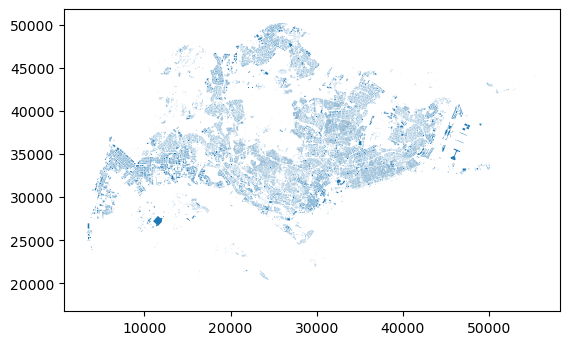

In [43]:
buildings.plot()

<Axes: >

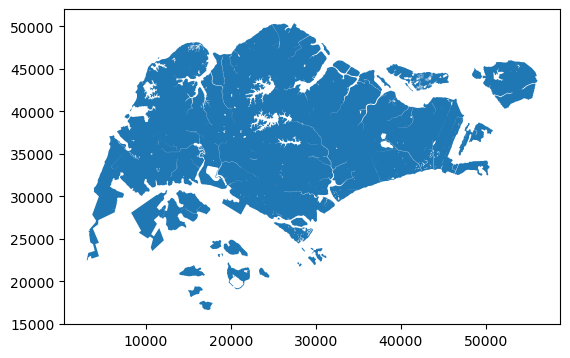

In [44]:
study_area = study_area.to_crs(local_crs)
study_area.plot()

In [45]:
## create directory ./out/singapore if it does not exist
def create_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
        
create_dir("./out/singapore")

In [46]:
## convert streets_noded_gdf, buildings, and study_area to local_crs

buildings.to_parquet("./out/singapore/buildings.pq")

study_area.to_parquet("./out/singapore/study_area.pq")

In [47]:
water.drop(columns=water.columns.difference(['geometry'])).to_crs(local_crs).reset_index(drop=True).to_parquet("./out/singapore/water.pq")

In [48]:
# iterate through the columns of streets, if it is a list, cast it as a string

for col in streets.columns:
    for i, row in streets.iterrows():
        if isinstance(row[col], list):
            streets.loc[i, col] = ','.join(str(streets.loc[i, col]))

/home/virgilxw/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:2961: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


In [52]:
import os
import glob

# define the directory path
directory_path = "./out/singapore/"

# define the pattern to match the files you want to delete
pattern = directory_path + "streets_raw*"

# use glob to get a list of files that match the pattern
file_list = glob.glob(pattern)

# loop through the list of files and delete each file
for file_path in file_list:
    try:
        os.remove(file_path)
        print(f"{file_path} has been deleted.")
    except OSError:
        print(f"Error while deleting file: {file_path}")

./out/singapore/streets_raw.shp.KIKI.7108.42784.sr.lock has been deleted.
./out/singapore/streets_raw.shx has been deleted.
./out/singapore/streets_raw.shp.xml has been deleted.
./out/singapore/streets_raw.cpg has been deleted.
./out/singapore/streets_raw.prj has been deleted.
./out/singapore/streets_raw.dbf has been deleted.
./out/singapore/streets_raw.shp has been deleted.
./out/singapore/streets_raw.geojson has been deleted.


In [53]:
# save streets to shapefile
streets.to_file("./out/singapore/streets_raw.shp", driver='ESRI Shapefile')

/tmp/ipykernel_9251/2533071392.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  streets.to_file("./out/singapore/streets_raw.shp", driver='ESRI Shapefile')


In [25]:
# # Create a polygon geodataframe from creating a 2 meter buffer around every line in streets_noded_gdf and dissolve it into study_area

# streets_noded_gdf_buffer = dgpd.from_geopandas(streets_noded_gdf, npartitions=4)
# streets_noded_gdf_buffer.buffer(2)

# study_area_dgpd = dgpd.from_geopandas(study_area, npartitions=4).append(streets_noded_gdf_buffer).dissolve()

In [26]:
# test = study_area_dgpd.compute()

In [27]:
# # dissolve streets_noded_gdf_buffer into study_area into one multipolygon in a geodataframe
# concat = pd.concat([study_area, streets_noded_gdf_buffer])

# study_area_polygon = gdf.geometry.unary_union
# study_area = gpd.GeoDataFrame(geometry=[dissolved_geom], crs=gdf.crs)

In [28]:
# enclosures = momepy.enclosures(noded_gdf , limit= study_area.to_crs(local_crs))

In [29]:
# enclosures.plot()

In [30]:
# # Perform a spatial join of the overlapping polygons with themselves
# spatial_join = gpd.sjoin(enclosures, enclosures, how="inner", op="intersects")

# # Count the number of overlapping polygons for each polygon
# overlapping_counts = spatial_join.groupby(["eID_left"]).size()

# # Get the polygons that overlap with more than one other polygon
# overlapping_count = overlapping_counts[overlapping_counts > 30].index.tolist()
